<a href="https://colab.research.google.com/github/naksh-atra/ML_/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# medical cost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')
print('m, n: ',df.shape)
df.head()

m, n:  (1338, 7)


Text(8.335000000000008, 0.5, 'Charges')

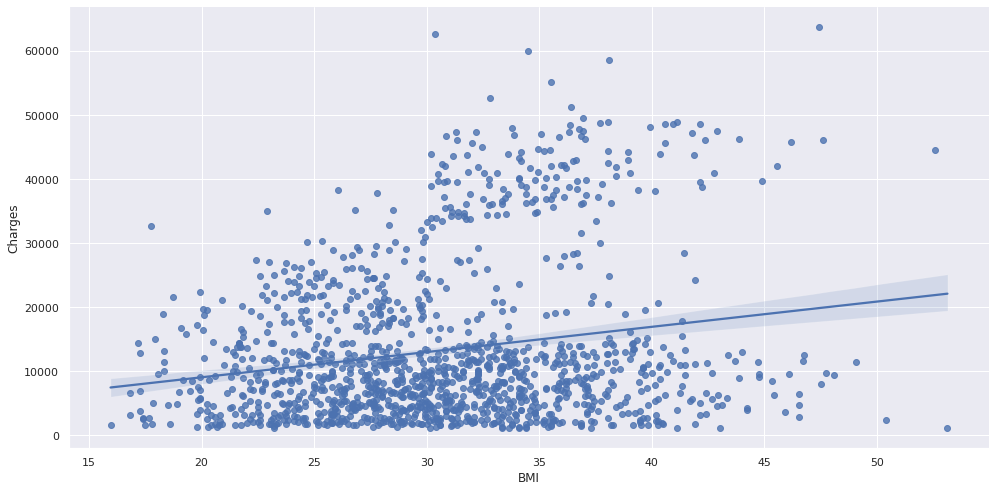

In [ ]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=7)
plt.xlabel('BMI')
plt.ylabel('Charges')

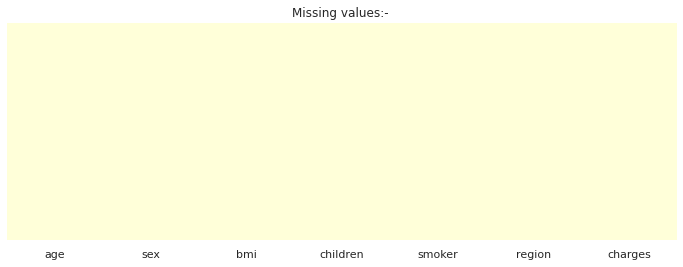

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.title('Missing values:- ')
#Shows no dark variations which means there are no null values in any column;

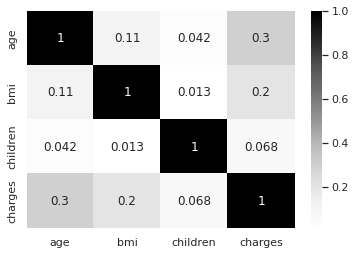

In [ ]:
sns.heatmap(df.corr(), cmap='Greys', annot=True)

Text(0.5, 1.0, 'Insurance charges in $log$')

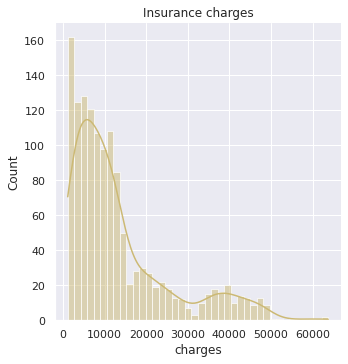

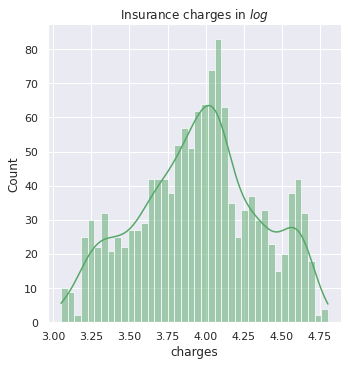

In [ ]:
sns.displot(data=df.charges,bins=40,color='chocolate', kde='True')
plt.title('Insurance charges')

sns.displot(np.log10(df.charges),bins=40,color='purple', kde='True')
plt.title('Insurance charges in $log$')

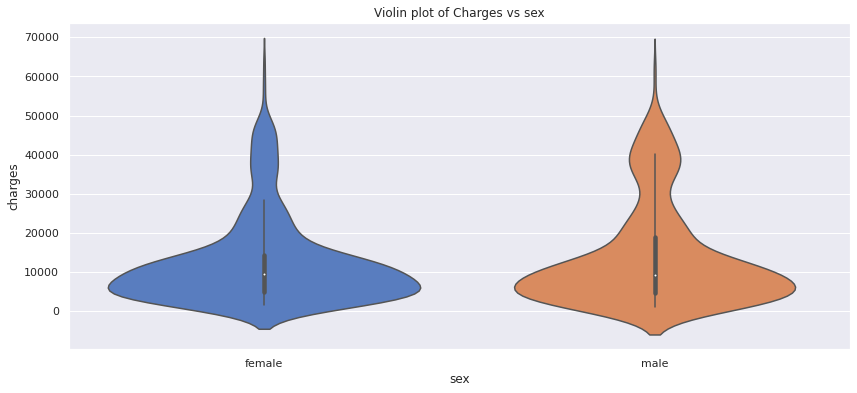

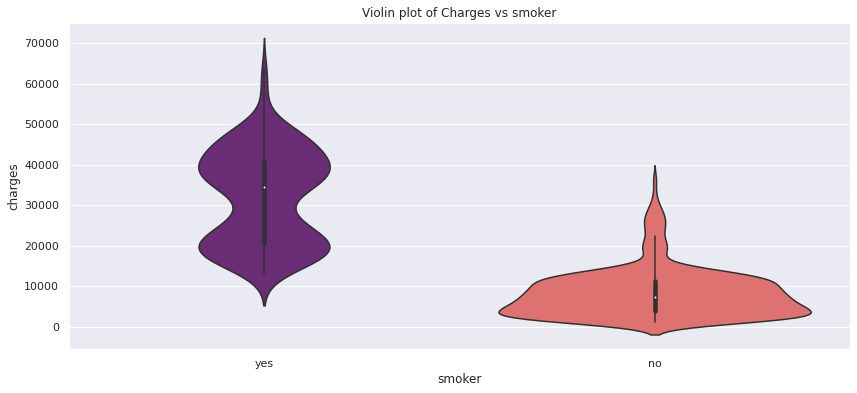

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.violinplot(x='sex', y='charges', data=df, palette='muted')
plt.title('Violin plot of Charges vs sex')
plt.show()
plt.figure(figsize=(14,6))
ax = sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Violin plot of Charges vs smoker');

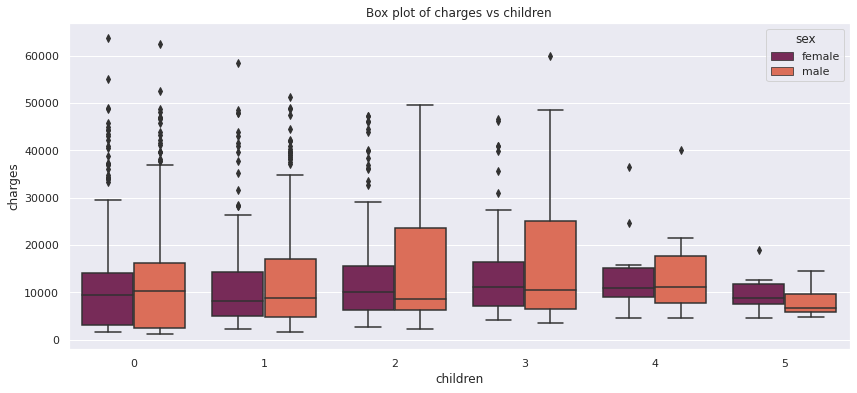

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rocket')
plt.title('Box plot of charges vs children');

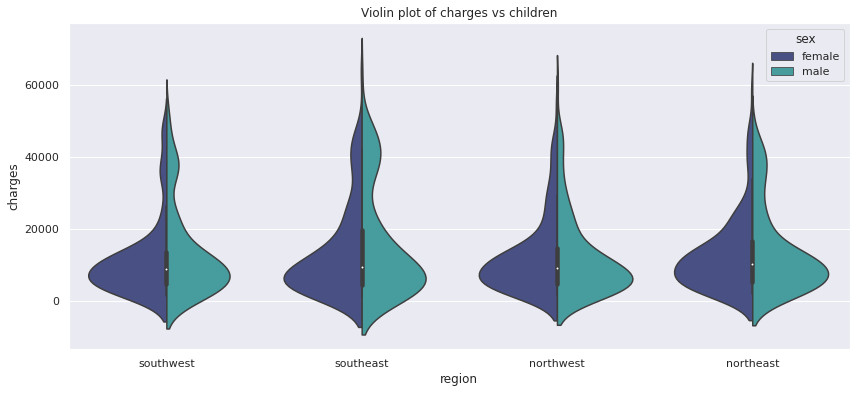

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='mako',split=True)
plt.title('Violin plot of charges vs children');

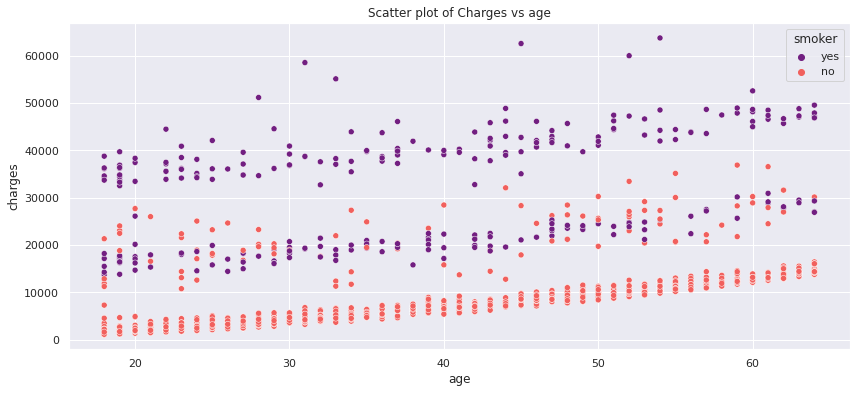

Text(0.5, 1.0, 'Scatter plot')

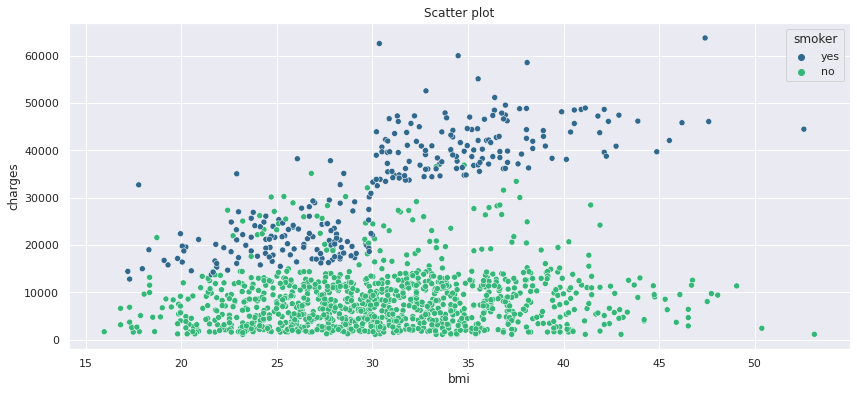

In [ ]:
f = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker')
plt.title('Scatter plot of Charges vs age')
plt.show()
f = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='bright',hue='smoker')
plt.title('Scatter plot')

In [ ]:
categorical_values = ['sex','children', 'smoker', 'region']
df_enc = pd.get_dummies(data = df, columns = categorical_values, drop_first =True, prefix = 'OHE', prefix_sep='_', dtype='int8')

In [ ]:
print('Columns previously: ',df.columns.values)print('m, n (no. of rows and columns) previously: ',df.shape)print('
Columns after dummy variable encoding: ',df_enc.columns.values)print('new m, n: ',df_enc.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [ ]:
df_encode['charges'] = np.log(df_encode['charges'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [ ]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322982
R square obtain for normal equation method is : 0.7795687545055306


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981898
R square obtain for scikit learn library is : 0.7795687545055318


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


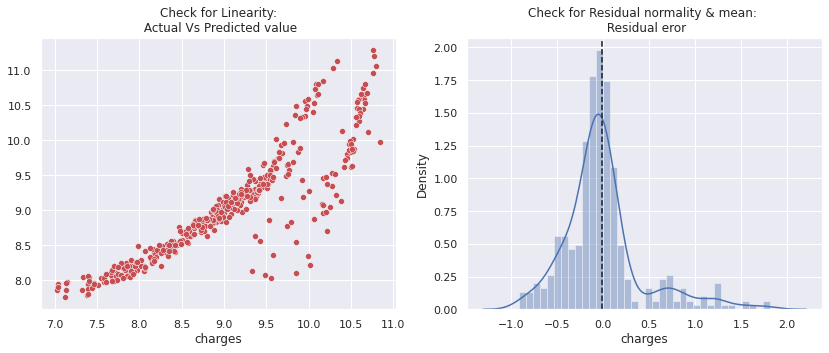

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

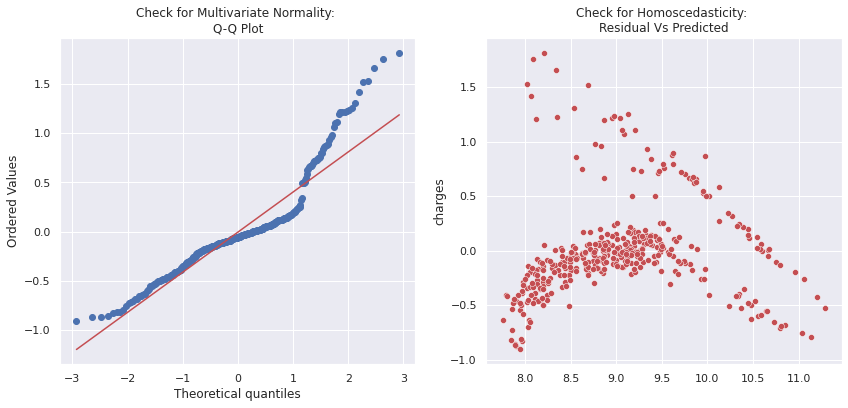

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911135